In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi

import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

If we have n qubits, we need to track 2^n complex amplitudes. 

In [3]:
#quantum circuit with three qubits, applying a Hadamard gate to each

qc = QuantumCircuit(3)

for qubit in range(3):
    qc.h(qubit)
    
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [6]:
svsim = Aer.get_backend('aer_simulator')

qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()

final_state

array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

In [11]:
#we can display this very nicely using LaTeX

from qiskit.visualization import array_to_latex

print("Statevector:")
array_to_latex(final_state)

Statevector:


<IPython.core.display.Latex object>

#### Single qubit gates on multi-qubit statevectors

Just as we use the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example:

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [18]:
usim = Aer.get_backend('aer_simulator')

qc.save_unitary()
qobj = assemble(qc)

unitary = usim.run(qobj).result().get_unitary()
unitary

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]])

In [20]:
print('Circuit:')
array_to_latex(unitary)

Circuit:


<IPython.core.display.Latex object>

In [24]:
#another example

qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [25]:
usim = Aer.get_backend('aer_simulator')

qc.save_unitary()
qobj = assemble(qc)

unitary = usim.run(qobj).result().get_unitary()

print('Circuit:')
array_to_latex(unitary)

Circuit:


<IPython.core.display.Latex object>

#### Multi-qubit gates

In [27]:
#CNOT

qc = QuantumCircuit(2)
qc.cx(0,1)

qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [30]:
#here's what the statevector looks like with one Hadamard added to a 2-qubit circuit

qc = QuantumCircuit(2)
qc.h(0)
print('Circuit:')
print(qc.draw())

svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)

final_state = svsim.run(qobj).result().get_statevector()

print('Statevector:')
array_to_latex(final_state)

Circuit:
     ┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
Statevector:


<IPython.core.display.Latex object>

In [34]:
#do the same thing, with a CNOT gate added

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

print('Circuit:')
print(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()

final_state = result.get_statevector()

print('Statevector:')
array_to_latex(final_state)

Circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector:


<IPython.core.display.Latex object>

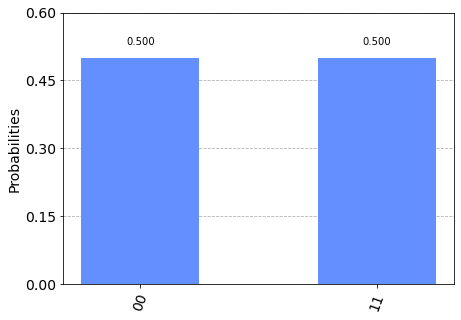

In [35]:
plot_histogram(result.get_counts())

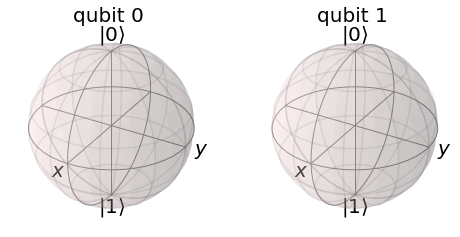

In [36]:
plot_bloch_multivector(final_state)

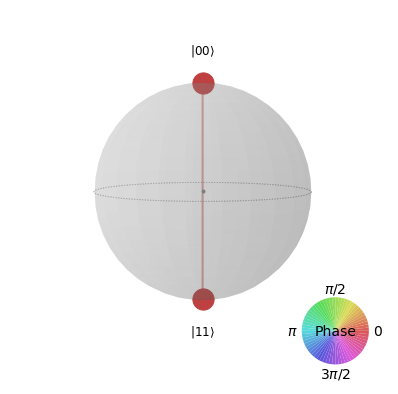

In [37]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(final_state)